In [1]:
%config Completer.use_jedi = False

In [2]:
import torch
from torch import Tensor
from torch.nn import Linear, MSELoss, functional as F
from torch.optim import SGD, Adam, RMSprop
from torch.autograd import Variable
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt

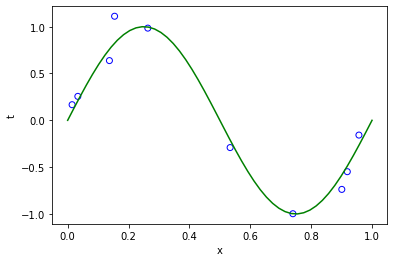

In [3]:
random.seed(12)

N = 10

#Create features
x = random.uniform(0, 1, (N,)).astype('f')
x = torch.FloatTensor(torch.from_numpy(x.astype(np.float32)))

#Create Labels
y = torch.FloatTensor(torch.sin(2*math.pi*x))
#Add noise
y = (y+random.permutation(random.normal(0, 10, (N,)) * 0.01)).float().unsqueeze(1)

#Create sin(2pi*x) function
t_x = np.linspace(0,1)
t_y = np.sin(2*math.pi*t_x)

#Plot
plt.scatter(x, y, facecolors = 'none', edgecolors = 'b')
plt.plot(t_x, t_y,'g-')
plt.xlabel("x")
plt.ylabel("t")
plt.show()

In [49]:
W_out = []
M = [0,1,2,3,4,5,6,7,8,9]

def make_features(x, m):
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1,m+1)],1)

def polynomial(x, weights):
    total = 0
    for j, w in enumerate(weights):
        total += w * x**j
    return total


class poly_model(torch.nn.Module):
    def __init__(self, m):
        super(poly_model, self).__init__()
        self.poly = torch.nn.Linear(m,1)
    
    def forward(self, x):
        out = self.poly(x).float()
        return out

#Create Test Sets
test_x = random.uniform(0, 1, (N,)).astype('f')
test_x = torch.FloatTensor(torch.from_numpy(test_x.astype(np.float32)))

test_y = torch.FloatTensor(torch.sin(2*math.pi*test_x))
test_y = (test_y+random.permutation(random.normal(0, 10, (N,)) * 0.01)).float().unsqueeze(1)

finished plotting degree 0 polynomial
finished plotting degree 1 polynomial
finished plotting degree 2 polynomial
finished plotting degree 3 polynomial
finished plotting degree 4 polynomial
finished plotting degree 5 polynomial
finished plotting degree 6 polynomial
finished plotting degree 7 polynomial
finished plotting degree 8 polynomial
finished plotting degree 9 polynomial


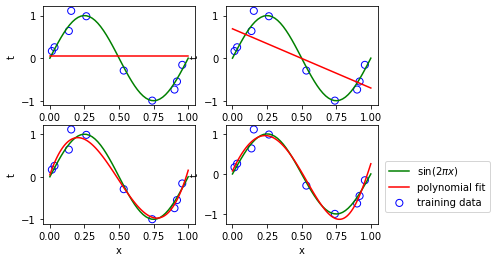

In [50]:
test_losses = {'m':[],
              'train_loss':[],
              'test_loss':[]}

plot_i = 0
for i, m in enumerate(M):
    if m == 0:
        W = torch.mean(y).unsqueeze(0)
    else:

        model = poly_model(m)

        criterion = torch.nn.MSELoss(reduction='sum')
        optimizer = torch.optim.SGD(model.parameters(), lr=.02)

        epochs = 50000
        for epoch in range(epochs):
            output = model(make_features(x, m))
            loss = criterion(output, y)
            print_loss = loss.data

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
#             if epoch % 5000 == 0:
#                 print('epoch : {}  loss : {}'.format(epoch,print_loss))
        W = torch.cat((model.state_dict()['poly.bias'][0].unsqueeze(0),model.state_dict()['poly.weight'][0]))
        
        test_output = model(make_features(test_x, m))
        test_loss = criterion(test_output, test_y)

        test_losses['m'].append(m)
        test_losses['train_loss'].append(print_loss)
        test_losses['test_loss'].append(test_loss.data)
    if m in [0,1,3,9]:
        plot_i += 1
        plt.subplot(2, 2, plot_i)
        plt.scatter(x, y, facecolors = 'none', edgecolors = 'b', s=50, label='training data')
        plt.plot(t_x, t_y,'g-', label = '$\sin(2\pi x)$')
        plt.plot(np.linspace(0,1,100), [polynomial(j, W) for j in np.linspace(0,1,100)], 'r-', label=f'polynomial fit')
        plt.xlabel("x")
        plt.ylabel("t")
    print(f'finished plotting degree {m} polynomial')
    
    
plt.legend(bbox_to_anchor=(1.05,0.64), loc=2, borderaxespad=0.)
plt.show()

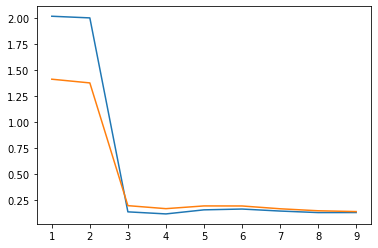

In [51]:
plt.plot(test_losses['m'], test_losses['train_loss'])
plt.plot(test_losses['m'], test_losses['test_loss'])
plt.show()

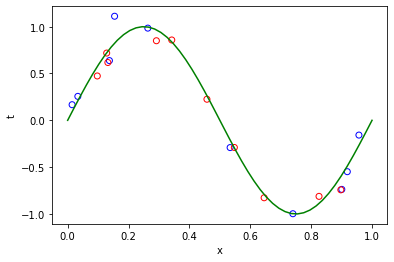

In [52]:
plt.scatter(x, y, facecolors = 'none', edgecolors = 'b')
plt.scatter(test_x, test_y, facecolors = 'none', edgecolors = 'r')
plt.plot(t_x, t_y,'g-')
plt.xlabel("x")
plt.ylabel("t")
plt.show()